# Rotina para fazer suavização - IPDIO atividade avaliativa

Projeto Carina, Fernanda e Jeandria

In [2]:
#####Funções de suavização com MetPy
# Baseado no arquivo Smoothing.py de:
# https://unidata.github.io/MetPy/latest/examples/calculations/Smoothing.html
#
#####

import pygrib
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
import metpy
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import cartopy.io.shapereader as shpreader
import metpy.calc as mpcalc
from itertools import product
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER

In [3]:
#### Buscando dados de vorticidade e pressão do ERA5:
#Abrindo os arquivos:
file = 'vorticidade_20200701.grib'
grbs = pygrib.open(file)

In [4]:
grbs.seek(0)

In [5]:
#Abrindo as variáveis:
grb_vort_850_t0 = grbs.select(name='Vorticity (relative)',level=850)[18]
vort_850 = grb_vort_850_t0.values

#Para o valor de vorticidade em unidade mais amigavel, multiplicar por 10000:
vort_850a = 10000*vort_850

#Buscando a latitude e longitude do arquivo do ERA5:
for g in grbs:
    lats, lons = g.latlons()
    lats, lons = np.array(lats), np.array(lons)

In [6]:
####Plotar com mais informações geográficas:

# Para colocar os estados no mapa:
estados_br= 'estados_2010/estados_2010.shp'
adm1_shapes = list(shpreader.Reader(estados_br).geometries())

# Informações sobre os limites do mapa:
extent = [-60, -30, -20, -50]

Campo de vorticidade sem suavização


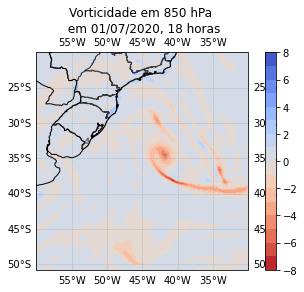

In [10]:
#### Plotar imagem

# Na projeção PlateCarree:
ax = plt.axes(projection=ccrs.PlateCarree())
ax.add_geometries(adm1_shapes,ccrs.PlateCarree(), edgecolor='black', facecolor='none', alpha=0.5)
ax.add_feature(cfeature.LAND)
ax.add_feature(cfeature.LAKES)
ax.gridlines(crs=ccrs.PlateCarree(),
       draw_labels=True,linewidth=0.5,color='gray',
       alpha=0.5,linestyle='--')
ax.xformatter = LONGITUDE_FORMATTER
ax.yformatter = LATITUDE_FORMATTER
ax.set_extent(extent)

# Coloca um fundo legal com relevo e oceano:
#ax.stock_img()
ax.add_feature(cfeature.BORDERS)
#ax.gridlines()
ax.coastlines(resolution='50m')

# Plotar vorticidade no mapa:
levels = np.linspace(-8,8,17)
vortic_850 = ax.contourf(lons,lats,vort_850a,levels=levels, cmap='coolwarm_r')

# Coloca o titulo:
plt.title('Vorticidade em 850 hPa \n em 01/07/2020, 18 horas')
# Coloca a barra lateral de cores da vorticidade:
cbar = plt.colorbar(vortic_850)

#plt.colorbar(vortic_850)
# Coloca a informacao em um arquivo:
plt.savefig('vort850_s_suav_20200701_18_coolwarmr_17levels.png')
print('Campo de vorticidade sem suavização')
plt.show()

# Metodos de suavização

# Gaussian smoother

In [11]:
####Plotar com mais informações geográficas:

# Para colocar os estados no mapa:
estados_br= 'estados_2010/estados_2010.shp'
adm1_shapes = list(shpreader.Reader(estados_br).geometries())

# Informações sobre os limites do mapa:
extent = [-60, -30, -20, -50]

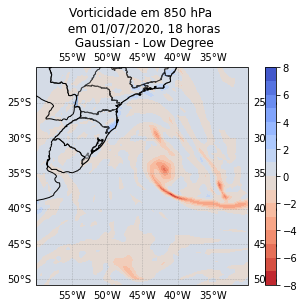

In [12]:
# Na projeção PlateCarree:
ax = plt.axes(projection=ccrs.PlateCarree())
ax.add_geometries(adm1_shapes,ccrs.PlateCarree(), edgecolor='black', facecolor='none', alpha=0.5)
ax.add_feature(cfeature.LAND)
ax.add_feature(cfeature.LAKES)
ax.gridlines(crs=ccrs.PlateCarree(),
       draw_labels=True,linewidth=0.5,color='gray',
       alpha=0.5,linestyle='--')
ax.xformatter = LONGITUDE_FORMATTER
ax.yformatter = LATITUDE_FORMATTER
ax.set_extent(extent)
# Coloca um fundo legal com relevo e oceano:
#ax.stock_img()
ax.add_feature(cfeature.BORDERS)
ax.coastlines(resolution='50m')

############### Gaussian Smoother ###############
#gaussian1 = mpcalc.smooth_gaussian(vort_850a, 3)
levels = np.linspace(-8,8,17)
gaus1 = ax.contourf(lons,lats,mpcalc.smooth_gaussian(vort_850a, 3),levels=levels,cmap='coolwarm_r')
plt.title('Vorticidade em 850 hPa \n em 01/07/2020, 18 horas\n Gaussian - Low Degree')
# Coloca a barra lateral de cores da vorticidade:
plt.colorbar(gaus1)
# Coloca a informacao em um arquivo:
#plt.savefig('vort850_gaus1_20200701_18.png')
#print('Campo de vorticidade com suavização - Gaussian - Low Degree')
#axa[0, 0].imshow(mpcalc.smooth_gaussian(vort_850a, 3))
#axa[0, 0].set_title('Gaussian - Low Degree')
plt.show()

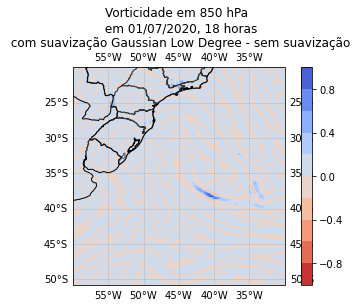

In [13]:
## Anomalia
ax = plt.axes(projection=ccrs.PlateCarree())
ax.add_geometries(adm1_shapes,ccrs.PlateCarree(), edgecolor='black', facecolor='none', alpha=0.5)
ax.add_feature(cfeature.LAND)
ax.add_feature(cfeature.LAKES)
ax.gridlines(crs=ccrs.PlateCarree(),
       draw_labels=True,linewidth=0.5,color='gray',
       alpha=0.5,linestyle='--')
ax.xformatter = LONGITUDE_FORMATTER
ax.yformatter = LATITUDE_FORMATTER
ax.set_extent(extent)
# Coloca um fundo legal com relevo e oceano:
#ax.stock_img()
ax.add_feature(cfeature.BORDERS)
ax.coastlines(resolution='50m')
levels_anom = np.linspace(-1,1,11)
anom_gaus = ax.contourf(lons,lats,(mpcalc.smooth_gaussian(vort_850a, 3)- vort_850a),levels=levels_anom,cmap='coolwarm_r')
plt.title('Vorticidade em 850 hPa \n em 01/07/2020, 18 horas\n com suavização Gaussian Low Degree - sem suavização')
# Coloca a barra lateral de cores da vorticidade:
plt.colorbar(anom_gaus)
#plt.savefig('vort850_vort-gaus1_20200701_18.png')
#print('Campo de vorticidade com suavização Gaussian Low Degree - sem suavização')
plt.show()


# Gaussian - High Degree

In [14]:
####Plotar com mais informações geográficas:

# Para colocar os estados no mapa:
estados_br= 'estados_2010/estados_2010.shp'
adm1_shapes = list(shpreader.Reader(estados_br).geometries())
# Informações sobre os limites do mapa:
extent = [-60, -30, -20, -50]

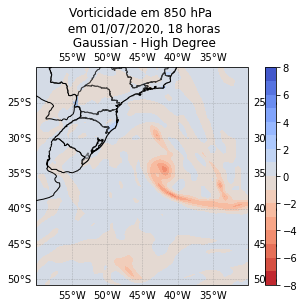

In [15]:
# Na projeção PlateCarree:
ax = plt.axes(projection=ccrs.PlateCarree())
ax.add_geometries(adm1_shapes,ccrs.PlateCarree(), edgecolor='black', facecolor='none', alpha=0.5)
ax.add_feature(cfeature.LAND)
ax.add_feature(cfeature.LAKES)
ax.gridlines(crs=ccrs.PlateCarree(),
       draw_labels=True,linewidth=0.5,color='gray',
       alpha=0.5,linestyle='--')
ax.xformatter = LONGITUDE_FORMATTER
ax.yformatter = LATITUDE_FORMATTER
ax.set_extent(extent)

# Coloca um fundo legal com relevo e oceano:
#ax.stock_img()
ax.add_feature(cfeature.BORDERS)
#ax.gridlines()
ax.coastlines(resolution='50m')

############### Gaussian - High Degree ###############
levels = np.linspace(-8,8,17)
gaus2 = ax.contourf(lons,lats,mpcalc.smooth_gaussian(vort_850a, 8),levels=levels,cmap='coolwarm_r')
plt.title('Vorticidade em 850 hPa \n em 01/07/2020, 18 horas\n Gaussian - High Degree')
# Coloca a barra lateral de cores da vorticidade:
plt.colorbar(gaus2)
# Coloca a informacao em um arquivo:
#plt.savefig('vort850_gaus2_20200701_18.png')
#print('Campo de vorticidade com suavização - Gaussian - High Degree')

plt.show()

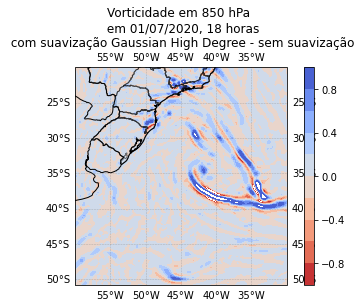

In [18]:
## Anomalia
ax = plt.axes(projection=ccrs.PlateCarree())
ax.add_geometries(adm1_shapes,ccrs.PlateCarree(), edgecolor='black', facecolor='none', alpha=0.5)
ax.add_feature(cfeature.LAND)
ax.add_feature(cfeature.LAKES)
ax.gridlines(crs=ccrs.PlateCarree(),
       draw_labels=True,linewidth=0.5,color='gray',
       alpha=0.5,linestyle='--')
ax.xformatter = LONGITUDE_FORMATTER
ax.yformatter = LATITUDE_FORMATTER
ax.set_extent(extent)
# Coloca um fundo legal com relevo e oceano:
ax.add_feature(cfeature.BORDERS)
ax.coastlines(resolution='50m')

levels_anom = np.linspace(-1,1,11)
anom_gaus2 = ax.contourf(lons,lats,(mpcalc.smooth_gaussian(vort_850a, 8)- vort_850a),levels=levels_anom,cmap='coolwarm_r')
plt.title('Vorticidade em 850 hPa \n em 01/07/2020, 18 horas\n com suavização Gaussian High Degree - sem suavização')
# Coloca a barra lateral de cores da vorticidade:
plt.colorbar(anom_gaus2)
#plt.savefig('vort850_vort-gaus1_20200701_18.png')
#print('Campo de vorticidade com suavização Gaussian High Degree - sem suavização')
plt.show()

# Rectangular Smoother

In [19]:
####Plotar com mais informações geográficas:

# Para colocar os estados no mapa:
estados_br= 'estados_2010/estados_2010.shp'
adm1_shapes = list(shpreader.Reader(estados_br).geometries())
# Informações sobre os limites do mapa:
extent = [-60, -30, -20, -50]


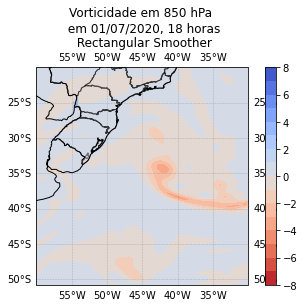

In [20]:
# Na projeção PlateCarree:
ax = plt.axes(projection=ccrs.PlateCarree())
ax.add_geometries(adm1_shapes,ccrs.PlateCarree(), edgecolor='black', facecolor='none', alpha=0.5)
ax.add_feature(cfeature.LAND)
ax.add_feature(cfeature.LAKES)
ax.gridlines(crs=ccrs.PlateCarree(),
       draw_labels=True,linewidth=0.5,color='gray',
       alpha=0.5,linestyle='--')
ax.xformatter = LONGITUDE_FORMATTER
ax.yformatter = LATITUDE_FORMATTER
ax.set_extent(extent)
# Coloca um fundo legal com relevo e oceano:
#ax.stock_img()
ax.add_feature(cfeature.BORDERS)
#ax.gridlines()
ax.coastlines(resolution='50m')

#### rectangular smoother
levels = np.linspace(-8,8,17)
rec_smo = ax.contourf(lons,lats,mpcalc.smooth_rectangular(vort_850a, (3, 7), 2),levels=levels,cmap='coolwarm_r')
plt.title('Vorticidade em 850 hPa \n em 01/07/2020, 18 horas\n Rectangular Smoother')
# Coloca a barra lateral de cores da vorticidade:
plt.colorbar(rec_smo)
# Coloca a informacao em um arquivo:
#plt.savefig('vort850_rec_smo_20200701_18.png')
#print('Campo de vorticidade com suavização - Rectangular Smoother')

plt.show()

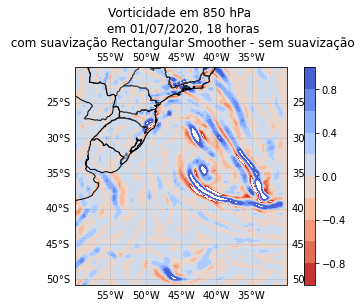

In [37]:
## Anomalia
ax = plt.axes(projection=ccrs.PlateCarree())
ax.add_geometries(adm1_shapes,ccrs.PlateCarree(), edgecolor='black', facecolor='none', alpha=0.5)
ax.add_feature(cfeature.LAND)
ax.add_feature(cfeature.LAKES)
ax.gridlines(crs=ccrs.PlateCarree(),
       draw_labels=True,linewidth=0.5,color='gray',
       alpha=0.5,linestyle='--')
ax.xformatter = LONGITUDE_FORMATTER
ax.yformatter = LATITUDE_FORMATTER
ax.set_extent(extent)
# Coloca um fundo legal com relevo e oceano:
ax.add_feature(cfeature.BORDERS)
ax.coastlines(resolution='50m')

levels_anom = np.linspace(-1,1,11)
anom_rec = ax.contourf(lons,lats,(mpcalc.smooth_rectangular(vort_850a, (3, 7), 2)- vort_850a),levels=levels_anom,cmap='coolwarm_r')
plt.title('Vorticidade em 850 hPa \n em 01/07/2020, 18 horas\n com suavização Rectangular Smoother - sem suavização')
# Coloca a barra lateral de cores da vorticidade:
plt.colorbar(anom_rec)
#plt.savefig('vort850_vort-gaus1_20200701_18.png')
#print('Campo de vorticidade com suavização Rectangular Smoother - sem suavização')
plt.show()

# 5-point smoother

In [25]:
####Plotar com mais informações geográficas:

# Para colocar os estados no mapa:
estados_br= 'estados_2010/estados_2010.shp'
adm1_shapes = list(shpreader.Reader(estados_br).geometries())
# Informações sobre os limites do mapa:
extent = [-60, -30, -20, -50]

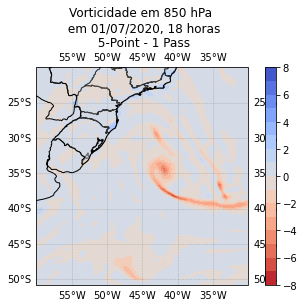

In [26]:
# Na projeção PlateCarree:
ax = plt.axes(projection=ccrs.PlateCarree())
ax.add_geometries(adm1_shapes,ccrs.PlateCarree(), edgecolor='black', facecolor='none', alpha=0.5)
ax.add_feature(cfeature.LAND)
ax.add_feature(cfeature.LAKES)
ax.gridlines(crs=ccrs.PlateCarree(),
       draw_labels=True,linewidth=0.5,color='gray',
       alpha=0.5,linestyle='--')
ax.xformatter = LONGITUDE_FORMATTER
ax.yformatter = LATITUDE_FORMATTER
ax.set_extent(extent)
# Coloca um fundo legal com relevo e oceano:
#ax.stock_img()
ax.add_feature(cfeature.BORDERS)
#ax.gridlines()
ax.coastlines(resolution='50m')

## 5-point
levels = np.linspace(-8,8,17)
smo_5_1 = ax.contourf(lons,lats,mpcalc.smooth_n_point(vort_850a, 5, 1),levels=levels,cmap='coolwarm_r')
plt.title('Vorticidade em 850 hPa \n em 01/07/2020, 18 horas\n 5-Point - 1 Pass')
# Coloca a barra lateral de cores da vorticidade:
plt.colorbar(smo_5_1)
# Coloca a informacao em um arquivo:
#plt.savefig('vort850_smo_5_1_20200701_18.png')
#print('Campo de vorticidade com suavização - 5-Point - 1 Pass')

plt.show()

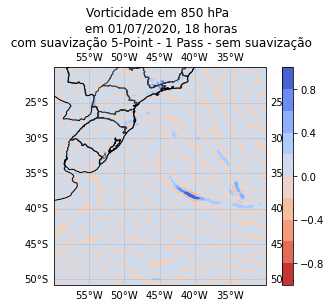

In [36]:
## Anomalia
ax = plt.axes(projection=ccrs.PlateCarree())
ax.add_geometries(adm1_shapes,ccrs.PlateCarree(), edgecolor='black', facecolor='none', alpha=0.5)
ax.add_feature(cfeature.LAND)
ax.add_feature(cfeature.LAKES)
ax.gridlines(crs=ccrs.PlateCarree(),
       draw_labels=True,linewidth=0.5,color='gray',
       alpha=0.5,linestyle='--')
ax.xformatter = LONGITUDE_FORMATTER
ax.yformatter = LATITUDE_FORMATTER
ax.set_extent(extent)
# Coloca um fundo legal com relevo e oceano:
ax.add_feature(cfeature.BORDERS)
ax.coastlines(resolution='50m')

levels_anom = np.linspace(-1,1,11)
anom_smo = ax.contourf(lons,lats,(mpcalc.smooth_n_point(vort_850a, 5, 1) - vort_850a),levels=levels_anom,cmap='coolwarm_r')
plt.title('Vorticidade em 850 hPa \n em 01/07/2020, 18 horas\n com suavização 5-Point - 1 Pass - sem suavização')
# Coloca a barra lateral de cores da vorticidade:
plt.colorbar(anom_smo)
#plt.savefig('vort850_vort-gaus1_20200701_18.png')
#print('Campo de vorticidade com suavização 5-Point - 1 Pass - sem suavização')
plt.show()

# 5-Point - 4 Pass

In [ ]:
####Plotar com mais informações geográficas:

# Para colocar os estados no mapa:
estados_br= 'estados_Brasil/estados_2010.shp'
adm1_shapes = list(shpreader.Reader(estados_br).geometries())
# Informações sobre os limites do mapa:
extent = [-60, -30, -20, -50]

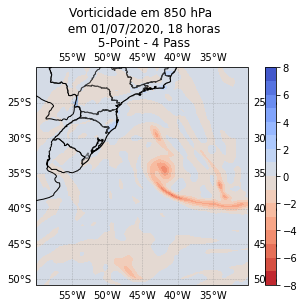

In [28]:
# Na projeção PlateCarree:
ax = plt.axes(projection=ccrs.PlateCarree())
ax.add_geometries(adm1_shapes,ccrs.PlateCarree(), edgecolor='black', facecolor='none', alpha=0.5)
ax.add_feature(cfeature.LAND)
ax.add_feature(cfeature.LAKES)
ax.gridlines(crs=ccrs.PlateCarree(),
       draw_labels=True,linewidth=0.5,color='gray',
       alpha=0.5,linestyle='--')
ax.xformatter = LONGITUDE_FORMATTER
ax.yformatter = LATITUDE_FORMATTER
ax.set_extent(extent)
# Coloca um fundo legal com relevo e oceano:
#ax.stock_img()
ax.add_feature(cfeature.BORDERS)
ax.coastlines(resolution='50m')

############### 5-Point - 4 Pass ###############
levels = np.linspace(-8,8,17)
smo_5_4 = ax.contourf(lons,lats,mpcalc.smooth_n_point(vort_850a, 5, 4),levels=levels, cmap='coolwarm_r')
plt.title('Vorticidade em 850 hPa \n em 01/07/2020, 18 horas\n 5-Point - 4 Pass')
# Coloca a barra lateral de cores da vorticidade:
plt.colorbar(smo_5_4)
# Coloca a informacao em um arquivo:
#plt.savefig('vort850_smo_5_4_20200701_18.png')
#print('Campo de vorticidade com suavização - 5-Point - 4 Pass')

plt.show()


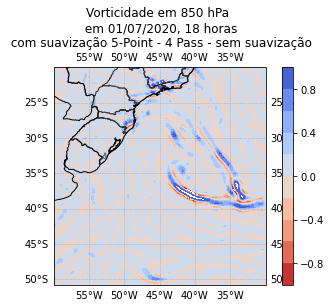

In [35]:
## Anomalia
ax = plt.axes(projection=ccrs.PlateCarree())
ax.add_geometries(adm1_shapes,ccrs.PlateCarree(), edgecolor='black', facecolor='none', alpha=0.5)
ax.add_feature(cfeature.LAND)
ax.add_feature(cfeature.LAKES)
ax.gridlines(crs=ccrs.PlateCarree(),
       draw_labels=True,linewidth=0.5,color='gray',
       alpha=0.5,linestyle='--')
ax.xformatter = LONGITUDE_FORMATTER
ax.yformatter = LATITUDE_FORMATTER
ax.set_extent(extent)
# Coloca um fundo legal com relevo e oceano:
ax.add_feature(cfeature.BORDERS)
ax.coastlines(resolution='50m')

levels_anom = np.linspace(-1,1,11)
anom_smo_4 = ax.contourf(lons,lats,(mpcalc.smooth_n_point(vort_850a, 5, 4) - vort_850a),levels=levels_anom,cmap='coolwarm_r')
plt.title('Vorticidade em 850 hPa \n em 01/07/2020, 18 horas\n com suavização 5-Point - 4 Pass - sem suavização')
# Coloca a barra lateral de cores da vorticidade:
plt.colorbar(anom_smo_4)
#plt.savefig('vort850_vort-gaus1_20200701_18.png')
#print('Campo de vorticidade com suavização 5-Point - 4 Pass - sem suavização')
plt.show()

# Circular Smoother

In [31]:
####Plotar com mais informações geográficas:

# Para colocar os estados no mapa:
estados_br= 'estados_2010/estados_2010.shp'
adm1_shapes = list(shpreader.Reader(estados_br).geometries())
# Informações sobre os limites do mapa:
extent = [-60, -30, -20, -50]

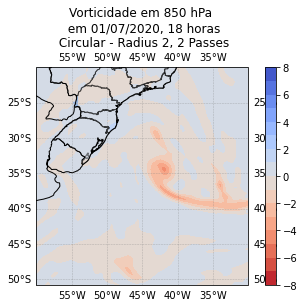

In [32]:
# Na projeção PlateCarree:
ax = plt.axes(projection=ccrs.PlateCarree())
ax.add_geometries(adm1_shapes,ccrs.PlateCarree(), edgecolor='black', facecolor='none', alpha=0.5)
ax.add_feature(cfeature.LAND)
ax.add_feature(cfeature.LAKES)
ax.gridlines(crs=ccrs.PlateCarree(),
       draw_labels=True,linewidth=0.5,color='gray',
       alpha=0.5,linestyle='--')
ax.xformatter = LONGITUDE_FORMATTER
ax.yformatter = LATITUDE_FORMATTER
ax.set_extent(extent)
ax.add_feature(cfeature.BORDERS)
ax.coastlines(resolution='50m')

############### Circular Smoother ###############
levels = np.linspace(-8,8,17)
circ_2_2 = ax.contourf(lons,lats,mpcalc.smooth_circular(vort_850a, 2, 2),levels=levels, cmap='coolwarm_r')
plt.title('Vorticidade em 850 hPa \n em 01/07/2020, 18 horas\n Circular - Radius 2, 2 Passes')
# Coloca a barra lateral de cores da vorticidade:
plt.colorbar(circ_2_2)
# Coloca a informacao em um arquivo:
#plt.savefig('vort850_circ_2_2_20200701_18.png')
#print('Campo de vorticidade com suavização - Circular - Radius2, 2 Passes')
plt.show()

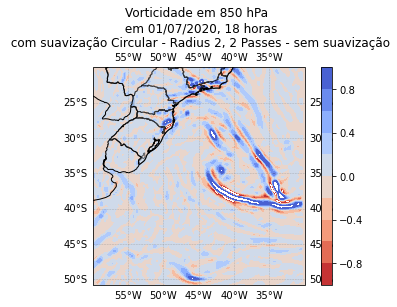

In [34]:
## Anomalia
ax = plt.axes(projection=ccrs.PlateCarree())
ax.add_geometries(adm1_shapes,ccrs.PlateCarree(), edgecolor='black', facecolor='none', alpha=0.5)
ax.add_feature(cfeature.LAND)
ax.add_feature(cfeature.LAKES)
ax.gridlines(crs=ccrs.PlateCarree(),
       draw_labels=True,linewidth=0.5,color='gray',
       alpha=0.5,linestyle='--')
ax.xformatter = LONGITUDE_FORMATTER
ax.yformatter = LATITUDE_FORMATTER
ax.set_extent(extent)
# Coloca um fundo legal com relevo e oceano:
ax.add_feature(cfeature.BORDERS)
ax.coastlines(resolution='50m')

levels_anom = np.linspace(-1,1,11)
anom_circ = ax.contourf(lons,lats,(mpcalc.smooth_circular(vort_850a, 2, 2) - vort_850a),levels=levels_anom,cmap='coolwarm_r')
plt.title('Vorticidade em 850 hPa \n em 01/07/2020, 18 horas\n com suavização Circular - Radius 2, 2 Passes - sem suavização')
# Coloca a barra lateral de cores da vorticidade:
plt.colorbar(anom_circ)
#plt.savefig('vort850_vort-gaus1_20200701_18.png')
#print('Campo de vorticidade com suavização Circular - Radius 2, 2 Passes - sem suavização')
plt.show()

# Arbitrary Window Smoother

In [6]:
# Para colocar os estados no mapa:
estados_br= 'estados_2010/estados_2010.shp'
adm1_shapes = list(shpreader.Reader(estados_br).geometries())
# Informações sobre os limites do mapa:
extent = [-60, -30, -20, -50]

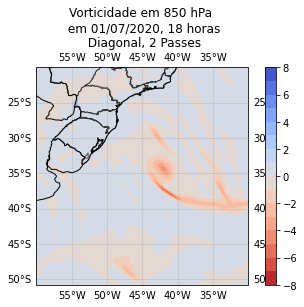

In [7]:
# Na projeção PlateCarree:
ax = plt.axes(projection=ccrs.PlateCarree())
ax.add_geometries(adm1_shapes,ccrs.PlateCarree(), edgecolor='black', facecolor='none', alpha=0.5)
ax.add_feature(cfeature.LAND)
ax.add_feature(cfeature.LAKES)
ax.gridlines(crs=ccrs.PlateCarree(),
       draw_labels=True,linewidth=0.5,color='gray',
       alpha=0.5,linestyle='--')
ax.xformatter = LONGITUDE_FORMATTER
ax.yformatter = LATITUDE_FORMATTER
ax.set_extent(extent)
# Coloca um fundo legal com relevo e oceano:
#ax.stock_img()
ax.add_feature(cfeature.BORDERS)
#ax.gridlines()
ax.coastlines(resolution='50m')

##### arbitrary window smoother
levels = np.linspace(-8,8,17)
diag_smo = ax.contourf(lons,lats,mpcalc.smooth_window(vort_850a, np.diag(np.ones(5)), 2),levels=levels,cmap='coolwarm_r')
plt.title('Vorticidade em 850 hPa \n em 01/07/2020, 18 horas\n Diagonal, 2 Passes')
# Coloca a barra lateral de cores da vorticidade:
plt.colorbar(diag_smo)
# Coloca a informacao em um arquivo:
#plt.savefig('vort850_diag_smo_20200701_18.png')
#print('Campo de vorticidade com suavização - Diagonal, 2 Passes')
plt.show()

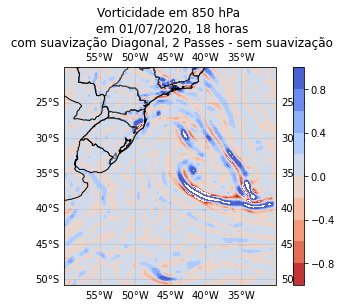

In [8]:
## Anomalia
ax = plt.axes(projection=ccrs.PlateCarree())
ax.add_geometries(adm1_shapes,ccrs.PlateCarree(), edgecolor='black', facecolor='none', alpha=0.5)
ax.add_feature(cfeature.LAND)
ax.add_feature(cfeature.LAKES)
ax.gridlines(crs=ccrs.PlateCarree(),
       draw_labels=True,linewidth=0.5,color='gray',
       alpha=0.5,linestyle='--')
ax.xformatter = LONGITUDE_FORMATTER
ax.yformatter = LATITUDE_FORMATTER
ax.set_extent(extent)
# Coloca um fundo legal com relevo e oceano:
ax.add_feature(cfeature.BORDERS)
ax.coastlines(resolution='50m')

levels_anom = np.linspace(-1,1,11)
anom_diag = ax.contourf(lons,lats,(mpcalc.smooth_circular(vort_850a, 2, 2) - vort_850a),levels=levels_anom,cmap='coolwarm_r')
plt.title('Vorticidade em 850 hPa \n em 01/07/2020, 18 horas\n com suavização Diagonal, 2 Passes - sem suavização')
# Coloca a barra lateral de cores da vorticidade:
plt.colorbar(anom_diag)
#plt.savefig('vort850_vort-gaus1_20200701_18.png')
#print('Campo de vorticidade com suavização Diagonal, 2 Passes - sem suavização')
plt.show()